In [5]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from tabulate import tabulate

In [6]:
#importando a base de dados train (base de dados sobre as vendas)

dtypes= {'Store':'int64'
              ,'DayOfWeek':'int64'
              ,'Date': 'object'
              ,'Sales': 'int64'
              ,'Customers': 'int64'
              ,'Open': 'int64'
              ,'Promo': 'int64'
              ,'StateHoliday': 'object'
              ,'SchoolHoliday': 'int64'}


df_train = pd.read_csv('C:\\Users\\AL106341\\Desktop\\Pós Graduação\\16 - TCC\\TCC\\train.csv' ,encoding='ISO-8859-1', dtype=dtypes, parse_dates=['Date'])

In [7]:
#quantidade de linhas e colunas do dataframe train
num_linhas, num_colunas = df_train.shape
print(f'O Dataframe train contêm {num_linhas} linhas e {num_colunas} colunas.')

O Dataframe train contêm 1017209 linhas e 9 colunas.


In [8]:
#importando a base de dados store (base de dados sobre as vendas)

df_store = pd.read_csv('C:\\Users\\AL106341\\Desktop\\Pós Graduação\\16 - TCC\\TCC\\store.csv' ,encoding='ISO-8859-1')

In [9]:
#quantidade de linhas e colunas do dataframe store
num_linhas, num_colunas = df_store.shape
print(f'O Dataframe store contêm {num_linhas} linhas e {num_colunas} colunas.')

O Dataframe store contêm 1115 linhas e 10 colunas.


In [10]:
print(df_store.dtypes)

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [11]:
teste = df_store['Assortment'].unique()
teste.sort()
print(teste)

['a' 'b' 'c']


In [12]:
#realizando a junção da base de dados store para a base de dados train
df_train_store = pd.merge(df_train, df_store, on='Store', how='left')
a,b = df_train_store.shape
print(f'O Dataframe store contêm {a} linhas e {b} colunas.')

O Dataframe store contêm 1017209 linhas e 18 colunas.


In [13]:
df_train_store.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
#verificação dos valores nulos na base de dados
df_train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

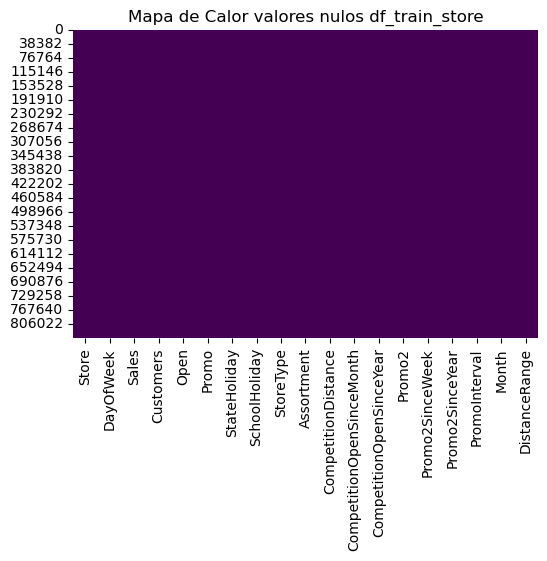

In [83]:
#cria um mapa de calor para visualizar a distribuição dos dados dos valores nulos

plt.figure(figsize=(6,4))
sns.heatmap(df_train_store.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de Calor valores nulos df_train_store')
plt.show()

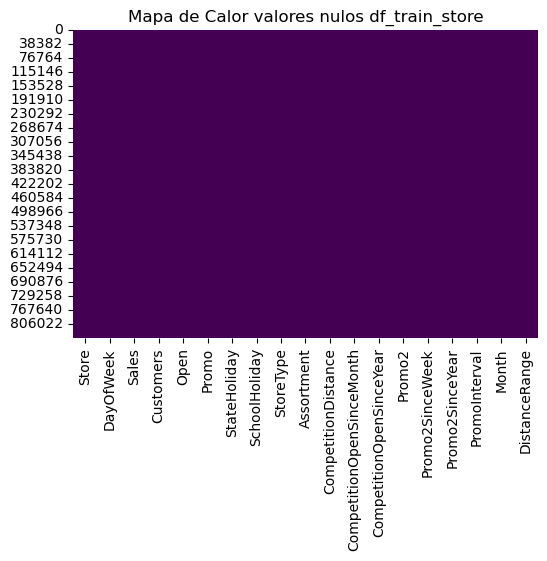

In [84]:
#substituir os valores nulos nas colunas específicas
colunas = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
df_train_store[colunas] = df_train_store[colunas].fillna(0)

#após a substituição verificar novamente o mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(df_train_store.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de Calor valores nulos df_train_store')
plt.show()

In [17]:
#verificando o percentual de preenchimento das informações
p = (1 - df_train_store.isnull().mean().mean()) * 100
print(p)

99.98557053881967


In [18]:
#correlação vendas e open

correlacao_vendas_open = df_train_store['Sales'].corr(df_train_store['Open'])
print(correlacao_vendas_open)

0.6784723460141535


In [19]:
#soma de vendas quando a loja estava fechada e aberta.
vendas_aberto_fechado = df_train_store.groupby('Open')['Sales'].sum().reset_index()

linhas_open_zero = df_train_store[(df_train_store['Open'] == 0) & (df_train_store['Sales'] == 0)].index

#excluir da base os dias que a loja estava fechada e não houve valor de vendas.
df_train_store = df_train_store.drop(linhas_open_zero)

# Resetando os índices
df_train_store.reset_index(drop=True, inplace=True)

contagem = df_train_store.shape[0]

print('A Quantidade de linhas após exclusão é de {}'.format(contagem))

A Quantidade de linhas após exclusão é de 844392


In [20]:
#Breve analise das informações das colunas Sales, Customers e CompetitionDistance

df_train_store[['Sales','Customers','CompetitionDistance']].describe()

,Sales,Customers,CompetitionDistance
count,844392.000000,844392.000000,842206.000000
mean,6955.514291,762.728395,5457.979627
std,3104.214680,401.227674,7809.437311
min,0.000000,0.000000,20.000000
25%,4859.000000,519.000000,710.000000
50%,6369.000000,676.000000,2320.000000
75%,8360.000000,893.000000,6890.000000
max,41551.000000,7388.000000,75860.000000


In [21]:
#verificando a correlação da coluna sales com as demais colunas 
colunas_numericas = df_train_store.select_dtypes(include='number')

correlacao = colunas_numericas.corr()['Sales']

print(correlacao)

Store                        0.007710
DayOfWeek                   -0.178736
Sales                        1.000000
Customers                    0.823597
Open                              NaN
Promo                        0.368145
SchoolHoliday                0.038617
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
Promo2SinceYear             -0.127621
Name: Sales, dtype: float64


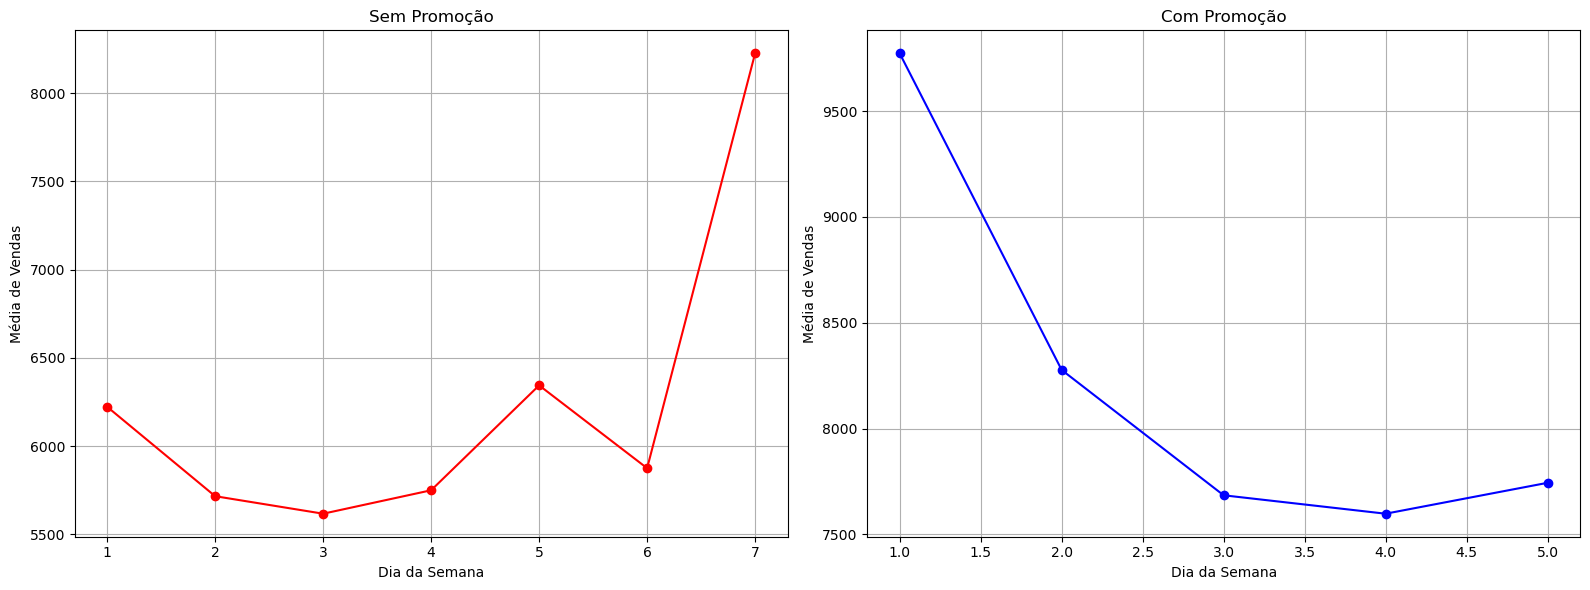

In [22]:
# Filtrar dados para os dias sem promoção
df_sem_promo = df_train_store[df_train_store['Promo'] == 0]
media_vendas_por_dia_sem_promo = df_sem_promo.groupby('DayOfWeek')['Sales'].mean()

# Filtrar dados para os dias com promoção
df_com_promo = df_train_store[df_train_store['Promo'] == 1]
media_vendas_por_dia_com_promo = df_com_promo.groupby('DayOfWeek')['Sales'].mean()

# Configurar o gráfico com subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotar médias de vendas para dias sem promoção
axes[0].plot(media_vendas_por_dia_sem_promo, marker='o', linestyle='-', color='r')
axes[0].set_title('Sem Promoção')
axes[0].set_xlabel('Dia da Semana')
axes[0].set_ylabel('Média de Vendas')
axes[0].grid(True)

# Plotar médias de vendas para dias com promoção
axes[1].plot(media_vendas_por_dia_com_promo, marker='o', linestyle='-', color='b')
axes[1].set_title('Com Promoção')
axes[1].set_xlabel('Dia da Semana')
axes[1].set_ylabel('Média de Vendas')
axes[1].grid(True)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [23]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


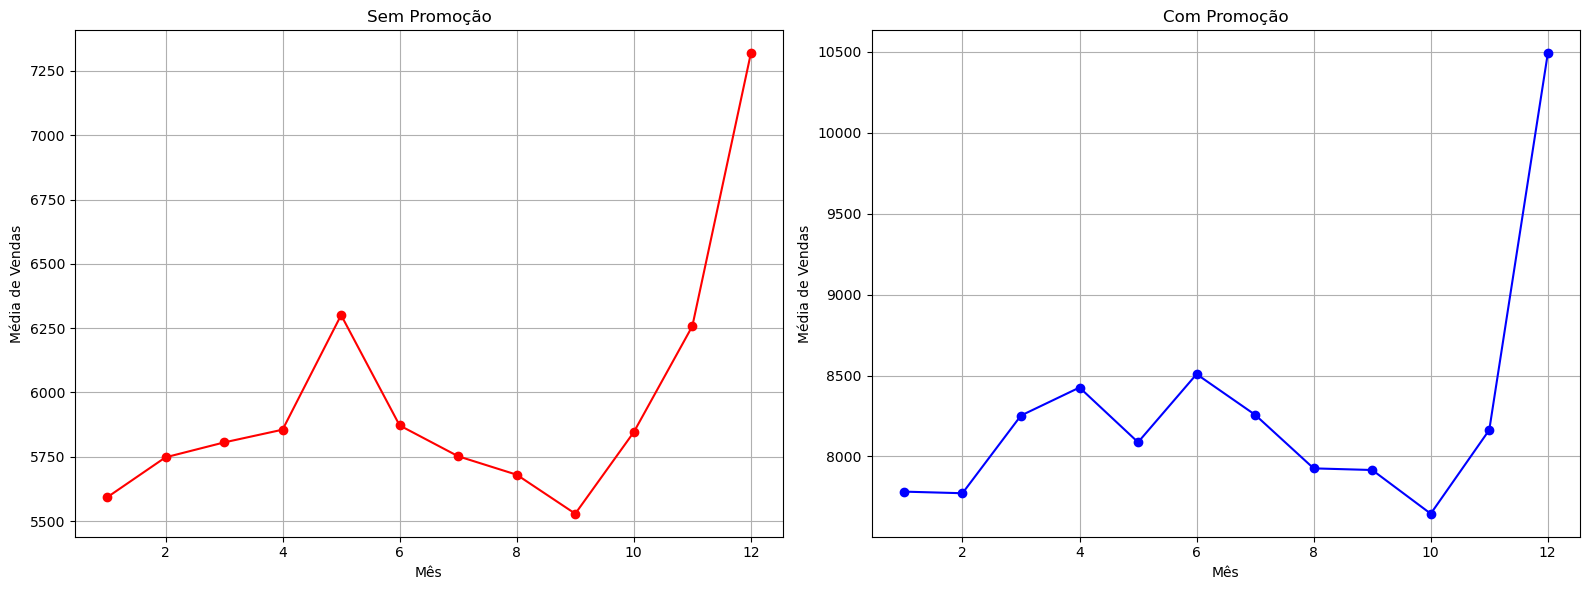

In [24]:
#criando uma coluna que representa o mês
df_train_store['Month'] = df_train_store['Date'].dt.month

df_sem_promo = df_train_store[df_train_store['Promo'] == 0]

df_com_promo = df_train_store[df_train_store['Promo'] == 1]

#sem promo
media_vendas_mes_sem_promo = df_sem_promo.groupby('Month')['Sales'].mean()

#com promo
media_vendas_mes_com_promo = df_com_promo.groupby('Month')['Sales'].mean()

#--- parte grafica

# Configurar o gráfico com subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotar médias de vendas para dias sem promoção
axes[0].plot(media_vendas_mes_sem_promo, marker='o', linestyle='-', color='r')
axes[0].set_title('Sem Promoção')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Média de Vendas')
axes[0].grid(True)

# Plotar médias de vendas para dias com promoção
axes[1].plot(media_vendas_mes_com_promo, marker='o', linestyle='-', color='b')
axes[1].set_title('Com Promoção')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Média de Vendas')
axes[1].grid(True)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [25]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,7


In [26]:
df_train_store.head()
#--media_vendas_sem_feriado = df_sem_feriado['Sales'].mean()
#--print(media_vendas_sem_feriado)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,7


In [27]:
df_train_store_filtrado = df_train_store.loc[(df_train_store['StateHoliday'] == '0') & (df_train_store['SchoolHoliday'] == 0)]
df_train_store_filtrado_2 = df_train_store.loc[(df_train_store['StateHoliday'] != '0') & (df_train_store['SchoolHoliday'] != 0)]

media_vendas_sem_feriado = df_train_store_filtrado['Sales'].mean()
media_vendas_com_feriado = df_train_store_filtrado_2['Sales'].mean()

print('A média de vendas nos dias sem feriado é {}'.format(media_vendas_sem_feriado))
print('A média de vendas nos dias com feriado é {}'.format(media_vendas_com_feriado))

A média de vendas nos dias sem feriado é 6895.153041351444
A média de vendas nos dias com feriado é 8907.162420382165


In [28]:
#qual tipo de loja tem a maior média de vendas?

media_vendas_tipo_loja = df_train_store.groupby('StoreType')['Sales'].mean()
print(media_vendas_tipo_loja)

StoreType
a     6925.167661
b    10231.407505
c     6932.512755
d     6822.141881
Name: Sales, dtype: float64


In [29]:
# impacto das promoções 
#Explore mais a fundo o impacto das promoções nas vendas, considerando a duração das promoções e se existe uma diferença significativa no comportamento do cliente durante esses períodos.

df_train_store.head()

promo_continua = (df_train_store['Promo2'] == 1)

vendas_promo_continua = df_train_store.loc[promo_continua,'Sales']

media_vendas_promo_continua = vendas_promo_continua.mean()

print('A média de vendas das lojas com promoção contínua é de {}'.format(media_vendas_promo_continua))


promo_nao_continua = (df_train_store['Promo2'] == 0)

vendas_promo_nao_continua = df_train_store.loc[promo_nao_continua,'Sales']

media_vendas_nao_continua = vendas_promo_nao_continua.mean()

print('A média de vendas das lojas que não possuem promoção contínua é de {}'.format(media_vendas_nao_continua))

A média de vendas das lojas com promoção contínua é de 6558.386062196469
A média de vendas das lojas que não possuem promoção contínua é de 7350.557935493625


In [30]:
# Relação entre Distância da Concorrência e Vendas:
correlacao = df_train_store['CompetitionDistance'].corr(df_train_store['Sales'])
print('Correlação entre Distância da Concorrência e Vendas:', correlacao)

# Criar intervalos de distância
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-8000', '8001-9000', '9001-10000', '10001+']

# Adicionar coluna 'DistanceRange' ao DataFrame
df_train_store['DistanceRange'] = pd.cut(df_train_store['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Calcular a média de vendas em cada intervalo
avg_sales_by_distance = df_train_store.groupby('DistanceRange')['Sales'].mean()
print(avg_sales_by_distance)

Correlação entre Distância da Concorrência e Vendas: -0.03639608890500285
DistanceRange
0-1000        7309.679305
1001-2000     7060.500991
2001-3000     6653.722201
3001-4000     6332.933297
4001-5000     7184.177899
5001-6000     6681.395044
6001-7000     6477.421416
7001-8000     6956.958325
8001-9000     6956.345576
9001-10000    6778.205510
10001+        6824.760993
Name: Sales, dtype: float64


In [31]:
correlation_sales_distance = df_train_store[['CompetitionDistance', 'Sales']].corr().iloc[0, 1]
correlation_customers_distance = df_train_store[['CompetitionDistance', 'Customers']].corr().iloc[0, 1]
correlation_sales_customers = df_train_store[['Sales', 'Customers']].corr().iloc[0, 1]

print('Correlação entre Distância da Concorrência e Vendas:', correlation_sales_distance)
print('Correlação entre Distância da Concorrência e Número de Clientes:', correlation_customers_distance)
print('Correlação entre Vendas e Número de Clientes:', correlation_sales_customers)

Correlação entre Distância da Concorrência e Vendas: -0.036396088905004884
Correlação entre Distância da Concorrência e Número de Clientes: -0.14850619039990035
Correlação entre Vendas e Número de Clientes: 0.8235967321975237


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [33]:
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64 

In [34]:
df_train_store.drop("Date",axis=1,inplace=True)

In [35]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,DistanceRange
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,1001-2000
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,0-1000
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,10001+
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7,0-1000
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,7,10001+


In [36]:
#retiramos a distancia por nao conter diferenças entre as lojas
nc=["Customers","CompetitionOpen","PromoOpen",] # numerica
kc=["Store","DayOfWeek","StateHoliday","SchoolHoliday", "StoreType","Assortment","Open","Promo","Promo2","Month","PromoInterval"] # categoricas

In [37]:
df_train_store['PromoInterval'].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [38]:
m2={0:"0","Jan,Apr,Jul,Oct":"Jan,Apr,Jul,Oct","Feb,May,Aug,Nov":"Feb,May,Aug,Nov","Mar,Jun,Sept,Dec":"Mar,Jun,Sept,Dec"}
df_train_store["PromoInterval"]=df_train_store["PromoInterval"].map(m2)

In [39]:
from sklearn.preprocessing import LabelEncoder

df_train_store[kc]=df_train_store[kc].astype("object")
le=LabelEncoder()
df_train_store.update(df_train_store[kc].apply(le.fit_transform))
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,DistanceRange
0,0,4,5263,555,0,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,6,1001-2000
1,1,4,6064,625,0,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2,6,0-1000
2,2,4,8314,821,0,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2,6,10001+
3,3,4,13995,1498,0,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,6,0-1000
4,4,4,4822,559,0,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,6,10001+


In [40]:
cols=df_train_store.columns.tolist()
cols.remove("Sales")
cols

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Month',
 'DistanceRange']

In [41]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas
numeric_cols = df_train_store.select_dtypes(include='number').columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler apenas nas colunas numéricas
df_train_store[numeric_cols] = scaler.fit_transform(df_train_store[numeric_cols])

In [42]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,DistanceRange
0,0,4,-0.545231,-0.517732,0,1,0,1,2,0,-0.536272,0.950941,0.682279,0,-0.757527,-0.997371,0,6,1001-2000
1,1,4,-0.287195,-0.343268,0,1,0,1,0,0,-0.625907,1.417831,0.681210,1,0.091710,1.000890,2,6,0-1000
2,2,4,0.437626,0.145233,0,1,0,1,0,0,1.110455,1.651277,0.680142,1,0.157036,1.001885,2,6,10001+
3,3,4,2.267720,1.832556,0,1,0,1,2,2,-0.619505,0.950941,0.683348,0,-0.757527,-0.997371,0,6,0-1000
4,4,4,-0.687296,-0.507763,0,1,0,1,0,0,3.131088,-0.216285,0.689761,0,-0.757527,-0.997371,0,6,10001+


In [46]:
# fazendo a divisão do conjunto de dados de treino
y = df_train_store["Sales"]
X = df_train_store.drop("Sales", axis=1)

# divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Construindo modelos de aprendizado de máquina baseados em árvore

Primeiramente, construiremos modelos de aprendizado de máquina baseados em árvore e, nestes modos, construiremos nossos dados peça por peça. Em seguida, compararemos os modelos calculando as métricas R Score e RMSE para cada modelo.

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

modelos=["DecisionTreeRegressor","BaggingRegressor","RandomForestRegressor","GradientBoostingRegressor"]
regressao=[DecisionTreeRegressor(random_state=0),BaggingRegressor(random_state=0),RandomForestRegressor(random_state=0),GradientBoostingRegressor(random_state=0)]
# ajuste de hiperparametro
parametro={
    modelos[0]:{"min_samples_split":range(2,10),"max_leaf_nodes":range(2,10)},
    modelos[1]:{"n_estimators":range(2,10)},
    modelos[2]:{"max_depth":range(2,10),"max_features":range(2,10),"n_estimators":range(2,10)},
    modelos[3]:{"learning_rate":[0.001,0.01],"n_estimators":range(2,10),"min_samples_split":range(2,10),"max_depth":range(2,5)}
}

### Comparando modelos

In [49]:
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'Promo2', 'PromoInterval', 'Month',
       'DistanceRange'],
      dtype='object')


In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

X_encoded = X.copy()
non_numeric_cols = X_encoded.select_dtypes(exclude=['number']).columns
numeric_cols = X_encoded.select_dtypes(include=['number']).columns
imputer_numeric = SimpleImputer(strategy='mean')
X_encoded[numeric_cols] = imputer_numeric.fit_transform(X_encoded[numeric_cols])

imputer_non_numeric = SimpleImputer(strategy='constant', fill_value='missing')
X_encoded[non_numeric_cols] = imputer_non_numeric.fit_transform(X_encoded[non_numeric_cols])

label_encoder = LabelEncoder()
X_encoded[non_numeric_cols] = X_encoded[non_numeric_cols].apply(label_encoder.fit_transform)

# Continue com a divisão dos dados e treinamento do modelo
for model_name, model in zip(modelos, regressao):
    cv_results = cross_validate(model, X_encoded, y, cv=5, scoring=['r2', 'neg_mean_squared_error'])
    print("############# {} ##############".format(model_name))
    print("R_score: {}".format(round(cv_results["test_r2"].mean(), 2)))
    print("RMSE: {}".format(round(cv_results["test_neg_mean_squared_error"].mean(), 2)))


############# DecisionTreeRegressor ##############
R_score: 0.94
RMSE: -0.06
############# BaggingRegressor ##############
R_score: 0.96
RMSE: -0.04
############# RandomForestRegressor ##############
R_score: 0.97
RMSE: -0.03
############# GradientBoostingRegressor ##############
R_score: 0.88
RMSE: -0.12


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Remover linhas com valores ausentes no conjunto de treinamento
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Criar e treinar o modelo RandomForestRegressor
rfmodel = RandomForestRegressor(random_state=0)

# Codificar variáveis categóricas usando LabelEncoder
label_encoder = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])

# Lidar com valores ausentes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Você pode ajustar a estratégia conforme necessário
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Ajustar o modelo
rfmodel.fit(X_train_imputed, y_train)

# Fazer previsões
rfpredict = rfmodel.predict(X_test_imputed)

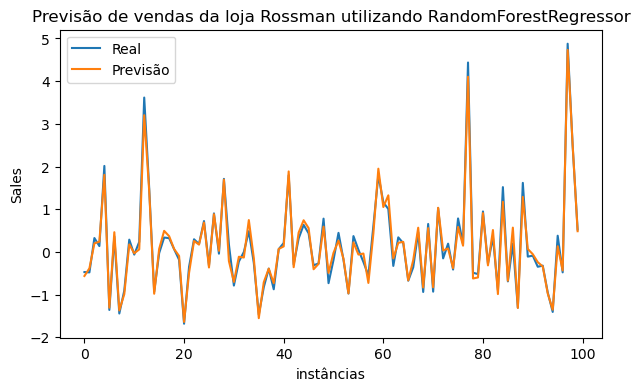

In [78]:
plt.figure(figsize=(6,4))
plt.plot(range(len(y_test[:100])),y_test[:100],label="Real")
plt.plot(range(len(y_test[:100])),rfpredict[:100],label="Previsão")
plt.title("Previsão de vendas da loja Rossman utilizando RandomForestRegressor")
plt.ylabel("Sales")
plt.xlabel("instâncias")
plt.legend()
plt.show()


Feature Ranking

Feature 2 , Customers 0.7412
Feature 7 , StoreType 0.0578
Feature 9 , CompetitionDistance 0.0561
Feature 0 , Store 0.0346
Feature 4 , Promo 0.034
Feature 13 , Promo2SinceWeek 0.0123
Feature 1 , DayOfWeek 0.0116
Feature 11 , CompetitionOpenSinceYear 0.0116
Feature 10 , CompetitionOpenSinceMonth 0.0108
Feature 8 , Assortment 0.0094
Feature 16 , Month 0.0086
Feature 14 , Promo2SinceYear 0.0063
Feature 15 , PromoInterval 0.0032
Feature 6 , SchoolHoliday 0.0013
Feature 12 , Promo2 0.0009
Feature 5 , StateHoliday 0.0002
Feature 3 , Open 0.0


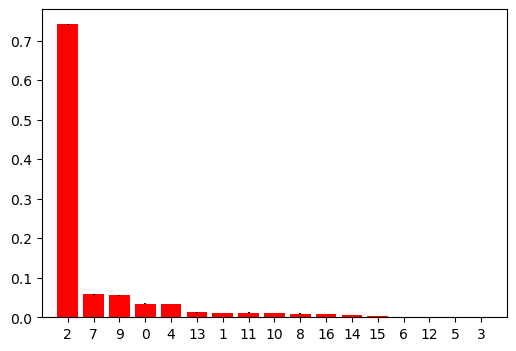

In [82]:
import numpy as np

# importância das features usando o modelo de random forest:
importances = rfmodel.feature_importances_
std=np.std([tree.feature_importances_ for tree in rfmodel.estimators_], axis=0)

indices=np.argsort(importances)[::-1]
colnames=list(X_train.columns)

# Ranking Feature:
print("\nFeature Ranking\n")
for f in range(X_train.shape[1]):
    print ("Feature", indices[f], ",", colnames[indices[f]], round(importances[indices[f]],4))
    
plt.figure(figsize=(6,4))
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()